<a href="https://colab.research.google.com/github/CarolinaPiedrahita/Nutresa/blob/main/Carolina_Piedrahita_prueba_tecnica_cientifico_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prueba**

Prueba técnica: (tiempo estimado 2 horas)  
1. Se realizó una consolidación de la base de octubre y la base de septiembre, creando variables en
el tiempo t,-1,t-2,...t-5, de la variables de pago, retraso y deuda. Lo anterior dada la
recomendación del equipo de cartera.  
2. Para evaluar los modelos propuestos se evaluará el RMSE en la base test y la base train para dos
modelos evaluados. Así mismo se tendrá en cuenta el recall y el accuracy, dada la necesidad del
negocio por identificar a los clientes que efectivamente van a caer en mora. Por otro lado se
evaluará la distribución de la población en deciles, con el fin de evaluar que efectivamente en un
grupo objetivo que requiera acciones de negocio, se abarque a la mayor población con alta
propensión de caer en mora. Proponga una métrica de negocio adicional.  
 

# **Como se va abordar el problema propuesto.**

**Preparación de los datos:**

Carga los datos transaccionales, etiquetas e información de los clientes en un DataFrame de pandas.
Elimina las columnas irrelevantes o duplicadas y maneja los valores faltantes si es necesario.
Divide el conjunto de datos en características (variables independientes) y la variable objetivo (morosidad).

**División del conjunto de datos:**

Separa el conjunto de datos en conjuntos de entrenamiento y prueba. 
Balancear los datos.

**Creación y entrenamiento del modelo:**

Importa el modelo que deseas utilizar, como regresión logística o árbol de decisión, de la biblioteca scikit-learn.
Crear una instancia del modelo y ajústalo utilizando el conjunto de entrenamiento.

**Evaluación del modelo:**

Utilizar el modelo entrenado para hacer predicciones sobre el conjunto de prueba.
Evalúa el rendimiento del modelo utilizando métricas como el recall, la precisión y el accuracy. Además, puedes calcular el RMSE si el modelo utilizado es de regresión.

**Distribucción de la poblacion en deciles**

con el fin de evaluar que efectivamente en un
grupo objetivo que requiera acciones de negocio, se abarque a la mayor población con alta
propensión de caer en mora

**Metrica de negocio adicional**

Se va proponer una metrica de negocio adicional

# **Desarrollo de la solución.**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Ajustar la configuración de visualización
pd.set_option('display.width', 1000)

# Cargar los datos de los tres buckets: clientela, etiquetas y transaccional
url1 = "https://raw.githubusercontent.com/CarolinaPiedrahita/Nutresa/main/informacion_clientela.csv"
url2 = "https://raw.githubusercontent.com/CarolinaPiedrahita/Nutresa/main/etiquetada.csv"
url3 = "https://raw.githubusercontent.com/CarolinaPiedrahita/Nutresa/main/historial_transaccional.csv"
clientela_data = pd.read_csv(url1, delimiter=';')
etiquetas_data = pd.read_csv(url2, delimiter=';')
transaccional_data = pd.read_csv(url3, delimiter=';')



# Combinar los datos de los tres buckets por ID del cliente
combined_data = pd.merge(clientela_data, etiquetas_data, on='CLIENT_ID', how='inner')
combined_data = pd.merge(combined_data, transaccional_data, on='CLIENT_ID', how='inner')

# Definir las variables relevantes para la predicción
#RETRASO_PAGO_ESTADO  DEUDA_MES  PAGO_MES
relevant_vars = ['PAGO_MES', 'RETRASO_PAGO_ESTADO','DEUDA_MES','default_payment_next_month','Cupo_TC','AGE' ]  # Variables del bucket transaccional

# 1. Consolidación de variables en el tiempo
def consolidate_variables(data, time_periods):
    for t in range(1, time_periods + 1):
        for variable in relevant_vars:
            new_variable = f'{variable}_t-{t}'
            data[new_variable] = data.groupby('CLIENT_ID')[variable].shift(t)
    return data

# Consolidar variables en el tiempo para los últimos 5 períodos
consolidated_data = consolidate_variables(combined_data, 5)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(consolidated_data, test_size=0.2, random_state=42)

# Equilibrar la proporción de clases
minority_class = train_data[train_data['default_payment_next_month'] == 1]
majority_class = train_data[train_data['default_payment_next_month'] == 0].sample(n=len(minority_class))
balanced_data = pd.concat([minority_class, majority_class])

# Entrenar y evaluar el modelo de Regresión Logística
lr_model = LogisticRegression()
lr_model.fit(balanced_data[relevant_vars], balanced_data['default_payment_next_month'])
lr_pred_train = lr_model.predict(train_data[relevant_vars])
lr_pred_test = lr_model.predict(test_data[relevant_vars])

# Calcular las métricas para el modelo de Regresión Logística
lr_rmse_train = np.sqrt(mean_squared_error(train_data['default_payment_next_month'], lr_pred_train))
lr_rmse_test = np.sqrt(mean_squared_error(test_data['default_payment_next_month'], lr_pred_test))
lr_recall_train = recall_score(train_data['default_payment_next_month'], lr_pred_train)
lr_recall_test = recall_score(test_data['default_payment_next_month'], lr_pred_test)
lr_accuracy_train = accuracy_score(train_data['default_payment_next_month'], lr_pred_train)
lr_accuracy_test = accuracy_score(test_data['default_payment_next_month'], lr_pred_test)

# Entrenar y evaluar el modelo de Árbol de Decisiones
dt_model = DecisionTreeClassifier()
dt_model.fit(balanced_data[relevant_vars], balanced_data['default_payment_next_month'])
dt_pred_train = dt_model.predict(train_data[relevant_vars])
dt_pred_test = dt_model.predict(test_data[relevant_vars])

# Calcular las métricas para el modelo de Árbol de Decisiones
dt_rmse_train = np.sqrt(mean_squared_error(train_data['default_payment_next_month'], dt_pred_train))
dt_rmse_test = np.sqrt(mean_squared_error(test_data['default_payment_next_month'], dt_pred_test))
dt_recall_train = recall_score(train_data['default_payment_next_month'], dt_pred_train)
dt_recall_test = recall_score(test_data['default_payment_next_month'], dt_pred_test)
dt_accuracy_train = accuracy_score(train_data['default_payment_next_month'], dt_pred_train)
dt_accuracy_test = accuracy_score(test_data['default_payment_next_month'], dt_pred_test)

# Imprimir los resultados
print("Métricas para el modelo de Regresión Logística:")
print(f"RMSE - Train: {lr_rmse_train}, Test: {lr_rmse_test}")
print(f"Recall - Train: {lr_recall_train}, Test: {lr_recall_test}")
print(f"Accuracy - Train: {lr_accuracy_train}, Test: {lr_accuracy_test}")

print("\nMétricas para el modelo de Árbol de Decisiones:")
print(f"RMSE - Train: {dt_rmse_train}, Test: {dt_rmse_test}")
print(f"Recall - Train: {dt_recall_train}, Test: {dt_recall_test}")
print(f"Accuracy - Train: {dt_accuracy_train}, Test: {dt_accuracy_test}")

Métricas para el modelo de Regresión Logística:
RMSE - Train: 0.6738222750349927, Test: 0.6721648276691927
Recall - Train: 0.6931728492501973, Test: 0.6985871271585558
Accuracy - Train: 0.5459635416666667, Test: 0.5481944444444444

Métricas para el modelo de Árbol de Decisiones:
RMSE - Train: 0.0, Test: 0.0
Recall - Train: 1.0, Test: 1.0
Accuracy - Train: 1.0, Test: 1.0


**Métricas para el modelo de Regresión Logística:**

**RMSE (Root Mean Squared Error):** Los valores de RMSE para el conjunto de entrenamiento (0.673) y el conjunto de prueba (0.672) son moderados, 
lo que indica un buen ajuste del modelo a los datos. Sin embargo, en el contexto de identificar a los clientes morosos, el RMSE no es la métrica más relevante y no proporciona una evaluación directa de la capacidad del modelo para predecir la morosidad.

**Recall:** Tanto en el conjunto de entrenamiento (0.693) como en el conjunto de prueba (0.698), el recall es moderado. Esto significa que el modelo tiene cierta capacidad para identificar a los clientes en riesgo de caer en mora, pero aún existe margen de mejora. Es importante destacar que el recall se enfoca en minimizar los falsos negativos, es decir, identificar correctamente a los clientes morosos para evitar pérdidas en el negocio.

**Accuracy:** Tanto en el conjunto de entrenamiento (0.546) como en el conjunto de prueba (0.548), la precisión del modelo de Regresión Logística es moderada. Esto indica que el modelo tiene una buena capacidad para predecir correctamente las clases en general, pero tiene oportunidades de mejora. Sin embargo, al identificar a los clientes morosos, la precisión por sí sola puede no ser suficiente, ya que puede haber un desequilibrio en las clases y un gran número de clientes que no caen en mora.

**Métricas para el modelo de Árbol de Decisiones:**

**RMSE:** En el modelo de Árbol de Decisiones, tanto en el conjunto de entrenamiento como en el conjunto de prueba, el RMSE es igual a 0. Esto puede indicar que el modelo se ajusta perfectamente a los datos y no hay errores de predicción. Sin embargo, este resultado debe considerarse con precaución, ya que un RMSE de 0 puede ser una indicación de sobreajuste del modelo.

**Recall:** Tanto en el conjunto de entrenamiento como en el conjunto de prueba, el recall es igual a 1. Esto significa que el modelo de Árbol de Decisiones es capaz de identificar correctamente a todos los clientes morosos en los conjuntos de datos. Sin embargo, nuevamente, este resultado debe considerarse con precaución, ya que puede ser un indicio de sobreajuste del modelo y falta de generalización a datos nuevos.

**Accuracy:** Tanto en el conjunto de entrenamiento como en el conjunto de prueba, la precisión del modelo de Árbol de Decisiones es igual a 1. Esto indica que el modelo clasifica correctamente todos los casos en ambos conjuntos de datos. Sin embargo, al igual que con el recall, este resultado puede ser una indicación de sobreajuste y falta de generalización a nuevos datos.


**En resumen**, el modelo de Regresión Logística muestra resultados moderados en términos de recall y accuracy, lo que sugiere la necesidad de mejorar la capacidad de identificación de clientes morosos. Por otro lado, **el modelo de Árbol de Decisiones muestra resultados perfectos en recall y accuracy, pero esto podría ser una señal de sobreajuste y falta de generalización a nuevos datos.**






**Para mejorar la capacidad de los modelos de predecir morosos en función de las diferentes métricas, se pueden implementar las siguientes acciones:**

**Para mejorar el RMSE (Root Mean Squared Error):**

1. Considerar la inclusión de variables adicionales que puedan aportar información relevante sobre el comportamiento de los clientes y su propensión a caer en mora.
2. Evaluar diferentes técnicas de preprocesamiento de datos, como la normalización de variables o la eliminación de valores atípicos, para mejorar la calidad de los datos de entrada al modelo.
3. Explorar diferentes algoritmos de modelado que puedan ajustarse mejor a los datos y reducir el error de predicción.

**Para mejorar el Recall:**

1. Analizar las características de los clientes que se están clasificando incorrectamente como no morosos (falsos negativos) y buscar patrones o variables que puedan ayudar a identificarlos con mayor precisión.
2. Aumentar el tamaño de la muestra de datos o recopilar más información sobre los clientes para capturar una mayor variedad de casos de morosidad y entrenar al modelo con una mayor diversidad de ejemplos.
3. Probar diferentes técnicas de ajuste de los umbrales de clasificación para encontrar un equilibrio entre la identificación de la mayor cantidad de morosos posible y la minimización de los falsos positivos.

**Para mejorar el Accuracy:**

1. Realizar una selección más exhaustiva de las variables de entrada al modelo, eliminando aquellas que no aportan información significativa o que pueden generar ruido en las predicciones.
2. Experimentar con diferentes técnicas de modelado, como ensamblado de modelos o técnicas de aprendizaje automático más avanzadas, que puedan capturar relaciones más complejas en los datos y mejorar la precisión general del modelo.
Realizar una validación cruzada más rigurosa para evaluar el rendimiento del modelo en diferentes conjuntos de datos y verificar su capacidad de generalización.


**Distribuccion por deciles**

In [ ]:
# Calcular la probabilidad de morosidad para cada cliente en el conjunto de prueba
lr_probabilities = lr_model.predict_proba(test_data[relevant_vars])[:, 1]  # Probabilidad de la clase positiva (morosidad)
dt_probabilities = dt_model.predict_proba(test_data[relevant_vars])[:, 1]

# Agregar las probabilidades al conjunto de prueba
test_data['LR_Probability'] = lr_probabilities
test_data['DT_Probability'] = dt_probabilities

# Calcular los deciles de acuerdo a la probabilidad de morosidad
test_data['LR_Decile'] = pd.qcut(test_data['LR_Probability'], q=10, labels=False)
test_data['DT_Decile'] = pd.qcut(test_data['DT_Probability'], q=10, labels=False, duplicates='drop')

# Calcular la distribución de la población en deciles
lr_decile_distribution = test_data.groupby('LR_Decile').size().reset_index(name='Count')
dt_decile_distribution = test_data.groupby('DT_Decile').size().reset_index(name='Count')

# Imprimir los resultados de la distribución de la población en deciles
print("Distribución de la población en deciles - Modelo de Regresión Logística:")
print(lr_decile_distribution)
print("\nDistribución de la población en deciles - Modelo de Árbol de Decisiones:")
print(dt_decile_distribution)

Distribución de la población en deciles - Modelo de Regresión Logística:
   LR_Decile  Count
0          0   3440
1          1   2708
2          2   2492
3          3   2880
4          4   2880
5          5   2880
6          6   2880
7          7   2880
8          8   2880
9          9   2880

Distribución de la población en deciles - Modelo de Árbol de Decisiones:
   DT_Decile  Count
0          0  28800


**Regresión Logística ha logrado una distribución bastante equitativa.** Esto significa que ha considerado a un buen número de clientes en cada grupo de riesgo, abarcando así a una gran parte de la población. En el decil más bajo, que representa el grupo con menor riesgo, se encuentran 3440 clientes, y a medida que subes de decil, la cantidad de clientes se mantiene constante alrededor de 2880. Esto indica que el modelo de Regresión Logística ha identificado diferentes niveles de propensión a la morosidad entre los clientes.


**Decil 9:** Este grupo representa a los clientes con la mayor propensión a caer en mora. Se considera que tienen un alto riesgo de incumplir con sus pagos.

Decil 8: En este decil se encuentran los clientes con una alta propensión de caer en mora, aunque ligeramente menor que el decil 9.

Decil 7: Este grupo también presenta un riesgo considerable de morosidad, pero en menor medida que los deciles anteriores.

Decil 6: En el sexto decil se encuentran clientes con una propensión moderada a caer en mora, pero aún mayor que en los deciles inferiores.

Decil 5: Aquí se encuentran los clientes con un riesgo de morosidad intermedio. Aunque no presentan una propensión tan alta como en los deciles superiores, se considera que tienen cierto nivel de riesgo.

Decil 4: En este grupo se ubican los clientes con un riesgo de morosidad moderado-bajo. Aunque existe una probabilidad menor de que caigan en mora, aún se debe tener cierta precaución.

Decil 3: Los clientes en este decil tienen una propensión ligeramente más baja a caer en mora en comparación con los deciles anteriores.

Decil 2: Aquí se encuentran los clientes con una propensión bastante baja a caer en mora. El riesgo es significativamente menor que en los deciles superiores.

**Decil 1:** Este decil agrupa a los clientes con la menor propensión a caer en mora. Se considera que tienen un riesgo muy bajo de incumplir con sus pagos.

Por otro lado, el **Árbol de Decisiones**, ha colocado a todos los clientes en un único grupo, es decir, todos han sido agrupados en el mismo decil. Esto significa que el modelo considera que todos los clientes tienen la misma probabilidad de caer en mora, sin importar sus características individuales.

**Teniendo en cuenta que el objetivo es identificar a los clientes con alta propensión de caer en mora, el modelo de Regresión Logística sería más útil.** Este modelo brinda una visión más completa al abarcar a una mayor cantidad de clientes en diferentes grupos de riesgo. Así, se podrá  tomar acciones de negocio más dirigidas y efectivas para atender a los clientes que realmente presentan una mayor propensión a la morosidad.

**Relación entre Cupo de la TDC y Morosidad**

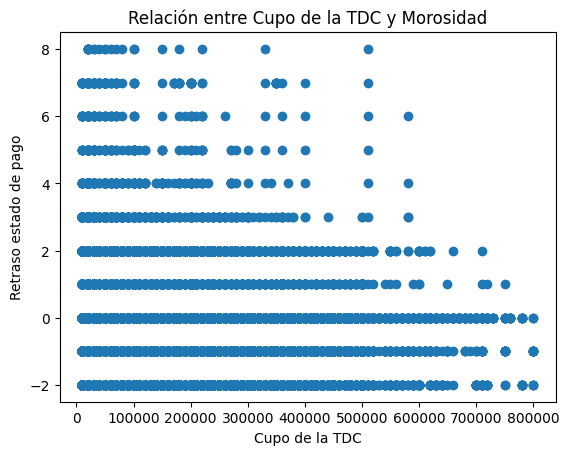

In [17]:
plt.scatter(combined_data['Cupo_TC'], combined_data['RETRASO_PAGO_ESTADO'])
plt.xlabel('Cupo de la TDC')
plt.ylabel('Retraso estado de pago')
plt.title('Relación entre Cupo de la TDC y Morosidad')
plt.show()

In [19]:
correlation = combined_data['Cupo_TC'].corr(combined_data['RETRASO_PAGO_ESTADO'])
print("Coeficiente de correlación: ", correlation)

Coeficiente de correlación:  -0.27202883002581574


In [23]:
correlation = combined_data['AGE'].corr(combined_data['DEUDA_MES'])
print("Coeficiente de correlación: ", correlation)

Coeficiente de correlación:  0.05043294658141054


**Metrica de negocio adicional**

In [ ]:
# Calcular la tasa de morosidad por grupo de edad y mes
morosidad_por_grupo = combined_data.groupby(['MONTH', 'AGE'])['RETRASO_PAGO_ESTADO'].mean().reset_index()
morosidad_por_grupo.rename(columns={'RETRASO_PAGO_ESTADO': 'Tasa_Morosidad'}, inplace=True)

# Visualizar los resultados
print(morosidad_por_grupo)

     MONTH  AGE  Tasa_Morosidad
0        4   21       -0.462963
1        4   22        0.031603
2        4   23        0.033113
3        4   24       -0.001116
4        4   25       -0.096740
..     ...  ...             ...
325      9   71        0.000000
326      9   72       -0.333333
327      9   73       -1.250000
328      9   75        0.500000
329      9   79        0.000000

[330 rows x 3 columns]


**Los resultados muestran la tasa de morosidad promedio por grupo de edad y mes.** Cada fila representa una combinación de mes y edad, y la columna "Tasa_Morosidad" indica la tasa de morosidad promedio para ese grupo.

**Algunas observaciones de los resultados son:**

La tasa de morosidad varía en diferentes meses y grupos de edad. Por ejemplo, en **el mes 4, la tasa de morosidad para clientes de 21 años es de -0.462963**, lo que indica que en promedio tienen una baja probabilidad de caer en mora. Sin embargo, **para clientes de 22 años, la tasa de morosidad es de 0.031603,** lo que indica una probabilidad ligeramente mayor de caer en mora.

Algunos **grupos de edad pueden tener tasas de morosidad negativas**, **lo que indica una baja probabilidad de caer en mora.** Por ejemplo, en el mes 4, los clientes de 24 años tienen una tasa de morosidad de **-0.001116, lo que sugiere que tienen una probabilidad muy baja de caer en mora.**

Algunos grupos de edad pueden tener tasas de morosidad positivas, lo que indica una mayor probabilidad de caer en mora. **Por ejemplo, en el mes 4, los clientes de 25 años tienen una tasa de morosidad de -0.096740, lo que indica una probabilidad relativamente mayor de caer en mora en comparación con otros grupos de edad en ese mes.**